In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = 'serif'

file_path = 'csv/merged_tunedlens_data_hi.csv'
df = pd.read_csv(file_path, encoding='utf-8')

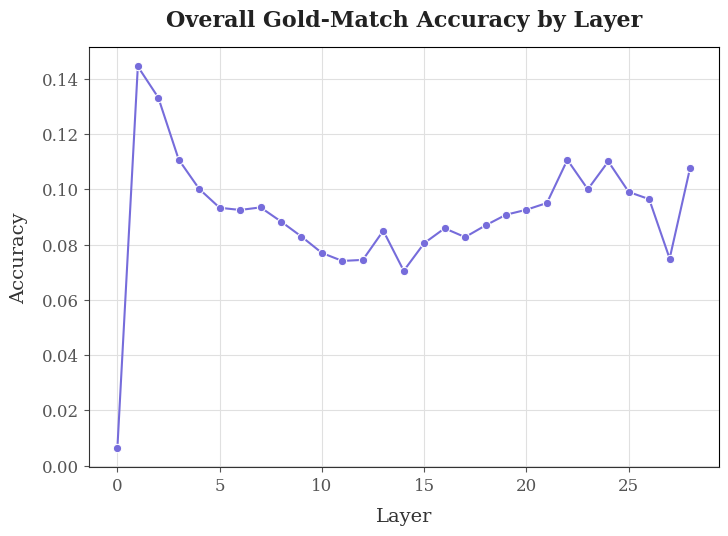

In [3]:
accuracy_layer = df.groupby('layer')['match_gold_answer'].mean().reset_index(name='accuracy')

# overall accuracy line
fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

sns.lineplot(data=accuracy_layer, x='layer', y='accuracy', marker='o', color='#766CDB', ax=ax)

ax.set_title('Overall Gold-Match Accuracy by Layer', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Layer', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Accuracy', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)

plt.show()

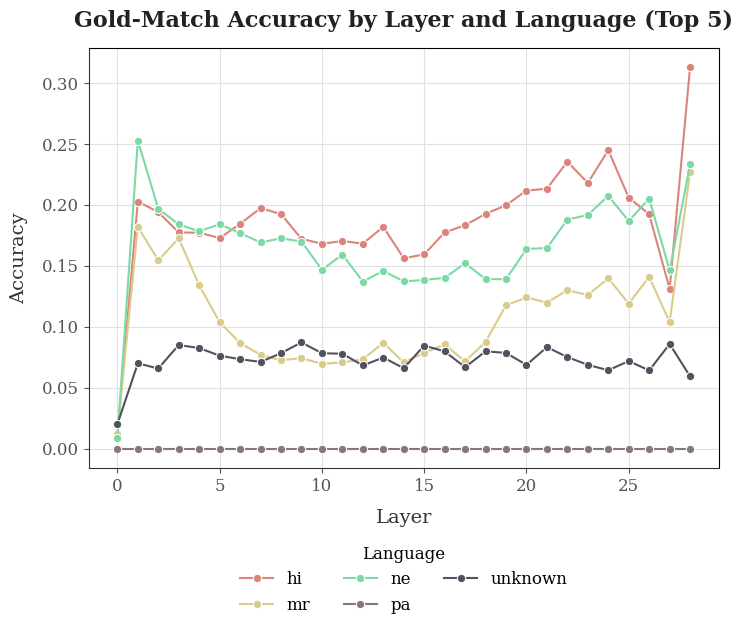

In [5]:
lang_counts = df['language'].value_counts().head(5).index.tolist()
subset = df[df['language'].isin(lang_counts)]
acc_lang_layer = subset.groupby(['layer','language'])['match_gold_answer'].mean().reset_index()

fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

palette = ['#DA847C','#D9CC8B','#7CD9A5','#877877','#52515E']
sns.lineplot(data=acc_lang_layer, x='layer', y='match_gold_answer', hue='language', palette=palette, marker='o', ax=ax)

ax.set_title('Gold-Match Accuracy by Layer and Language (Top 5)', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Layer', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Accuracy', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)

ax.legend(title='Language', fontsize=12, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

plt.show()

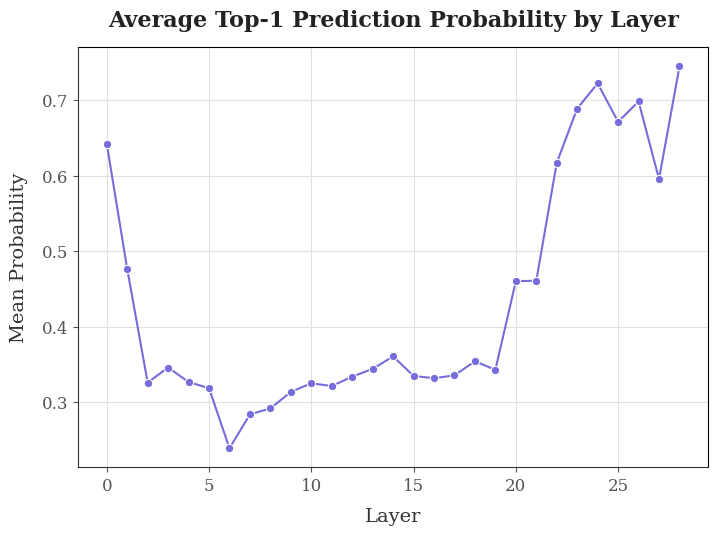

In [6]:
avg_prob_layer = df[df['rank'] == 1].groupby('layer')['probability'].mean().reset_index(name='avg_top1_prob')

fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

sns.lineplot(data=avg_prob_layer, x='layer', y='avg_top1_prob', marker='o', color='#766CDB', ax=ax)

ax.set_title('Average Top-1 Prediction Probability by Layer', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Layer', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Mean Probability', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)

plt.show()

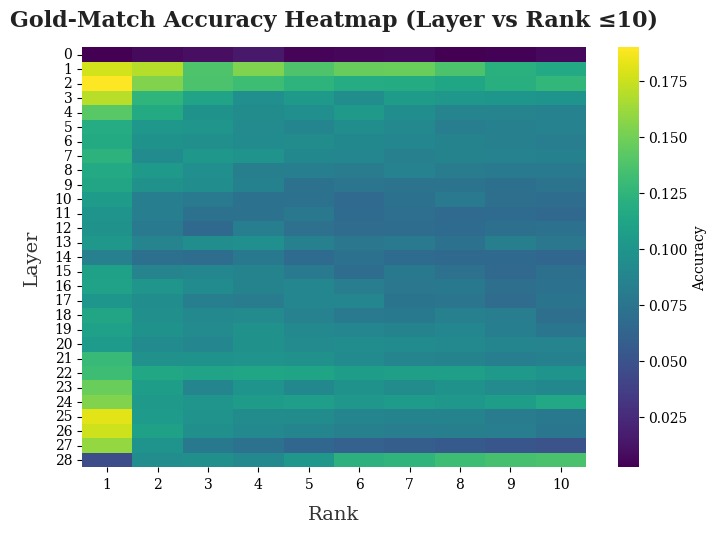

In [7]:
heat_df = df[df['rank']<=10].groupby(['layer','rank'])['match_gold_answer'].mean().reset_index()
heat_pivot = heat_df.pivot(index='layer', columns='rank', values='match_gold_answer')

fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

sns.heatmap(heat_pivot, cmap='viridis', ax=ax, cbar_kws={'label':'Accuracy'})

ax.set_title('Gold-Match Accuracy Heatmap (Layer vs Rank ≤10)', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Rank', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Layer', fontsize=14, fontweight='medium', color='#333333', labelpad=10)

plt.show()

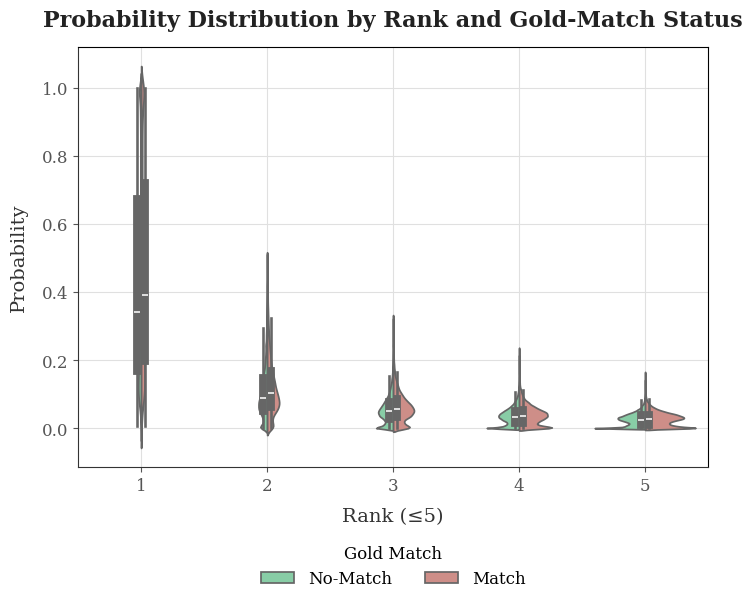

In [8]:
subset_violin = df[df['rank']<=5].copy()
subset_violin['match_label'] = subset_violin['match_gold_answer'].map({True:'Match', False:'No-Match'})

fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

sns.violinplot(data=subset_violin, x='rank', y='probability', hue='match_label', split=True, palette=['#7CD9A5','#DA847C'], ax=ax)

ax.set_title('Probability Distribution by Rank and Gold-Match Status', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Rank (≤5)', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Probability', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)

ax.legend(title='Gold Match', fontsize=12, title_fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

plt.show()

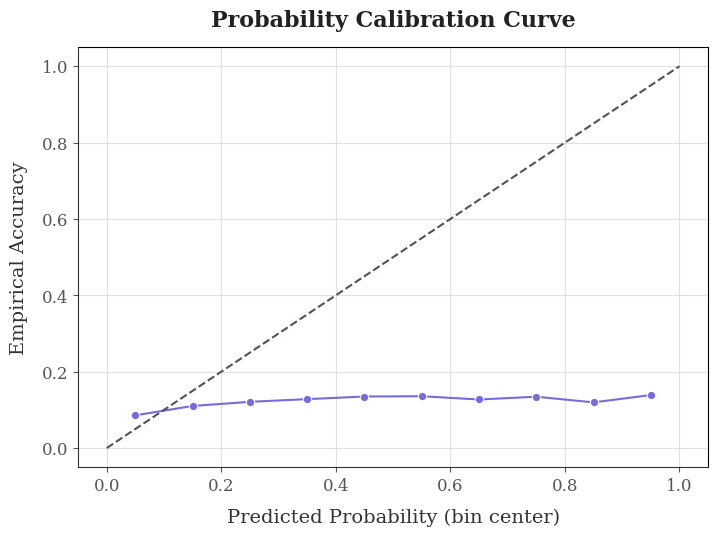

In [9]:
bins = np.linspace(0, 1, 11)
df['prob_bin'] = pd.cut(df['probability'], bins=bins, include_lowest=True, labels=False)
calib = df.groupby('prob_bin')['match_gold_answer'].mean().reset_index()
calib['bin_center'] = (bins[:-1] + bins[1:]) / 2

fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

sns.lineplot(x='bin_center', y='match_gold_answer', data=calib, marker='o', color='#766CDB', ax=ax)
ax.plot([0,1],[0,1], linestyle='--', color='#52515E')

ax.set_title('Probability Calibration Curve', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Predicted Probability (bin center)', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Empirical Accuracy', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)

plt.show()

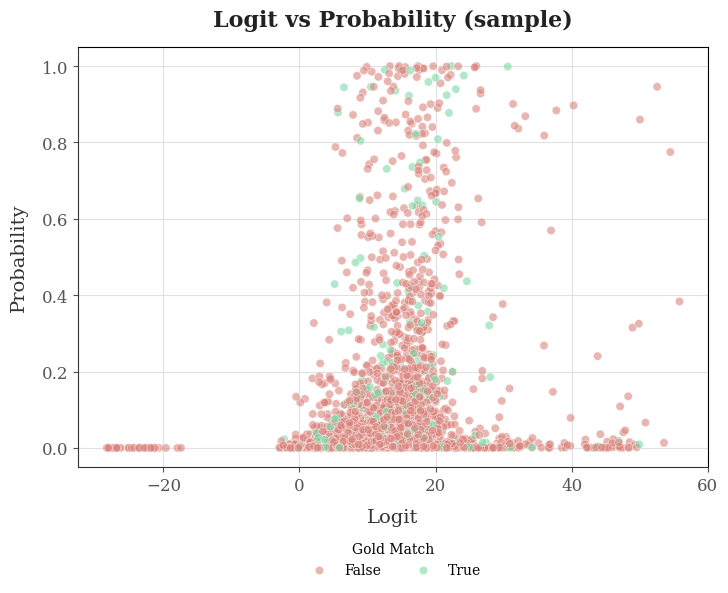

In [10]:
fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

sample_df = df.sample(5000, random_state=0) if len(df) > 5000 else df.copy()

sns.scatterplot(x='logit', y='probability', hue='match_gold_answer', data=sample_df, palette=['#DA847C','#7CD9A5'], alpha=0.6, ax=ax)

ax.set_title('Logit vs Probability (sample)', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Logit', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Probability', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)

ax.legend(title='Gold Match', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

plt.show()

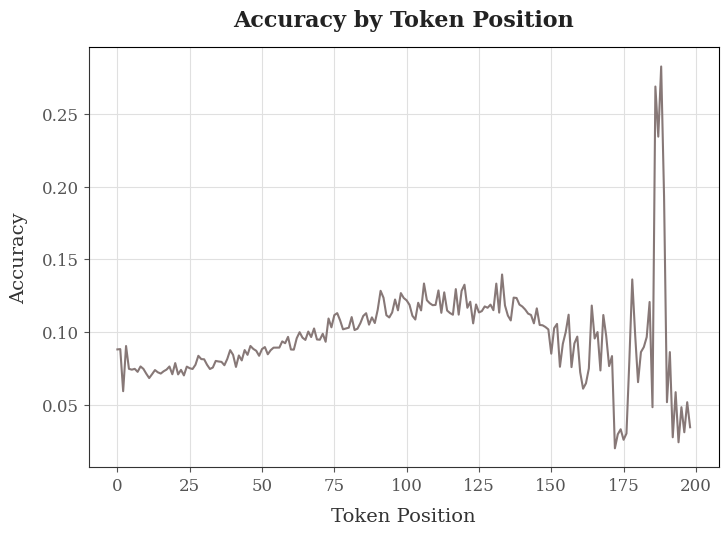

In [11]:
pos_acc = df.groupby('token_position')['match_gold_answer'].mean().reset_index()

fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

sns.lineplot(data=pos_acc, x='token_position', y='match_gold_answer', color='#877877', ax=ax)

ax.set_title('Accuracy by Token Position', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Token Position', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Accuracy', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, color='#E0E0E0')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)

plt.show()


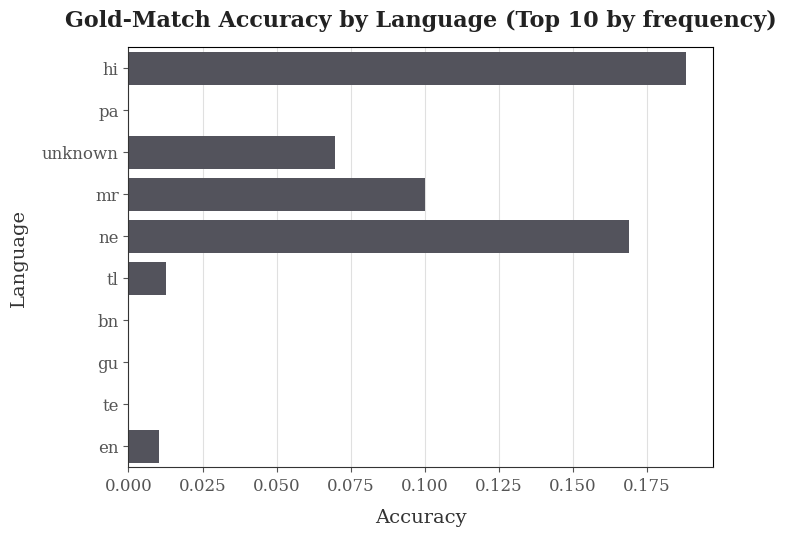

In [12]:
lang_counts = df['language'].value_counts().head(10)
lang_acc = df.groupby('language')['match_gold_answer'].mean().loc[lang_counts.index].reset_index()

fig, ax = plt.subplots(figsize=(9,6))
plt.subplots_adjust(left=0.25, right=0.9, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

sns.barplot(data=lang_acc, y='language', x='match_gold_answer', palette=['#52515E']*len(lang_acc), ax=ax)

ax.set_title('Gold-Match Accuracy by Language (Top 10 by frequency)', fontsize=16, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Accuracy', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Language', fontsize=14, fontweight='medium', color='#333333', labelpad=10)
ax.grid(True, axis='x', color='#E0E0E0')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_color('#333333')
ax.spines['bottom'].set_color('#333333')
ax.tick_params(axis='both', colors='#555555', labelsize=12)

plt.show()

In [13]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

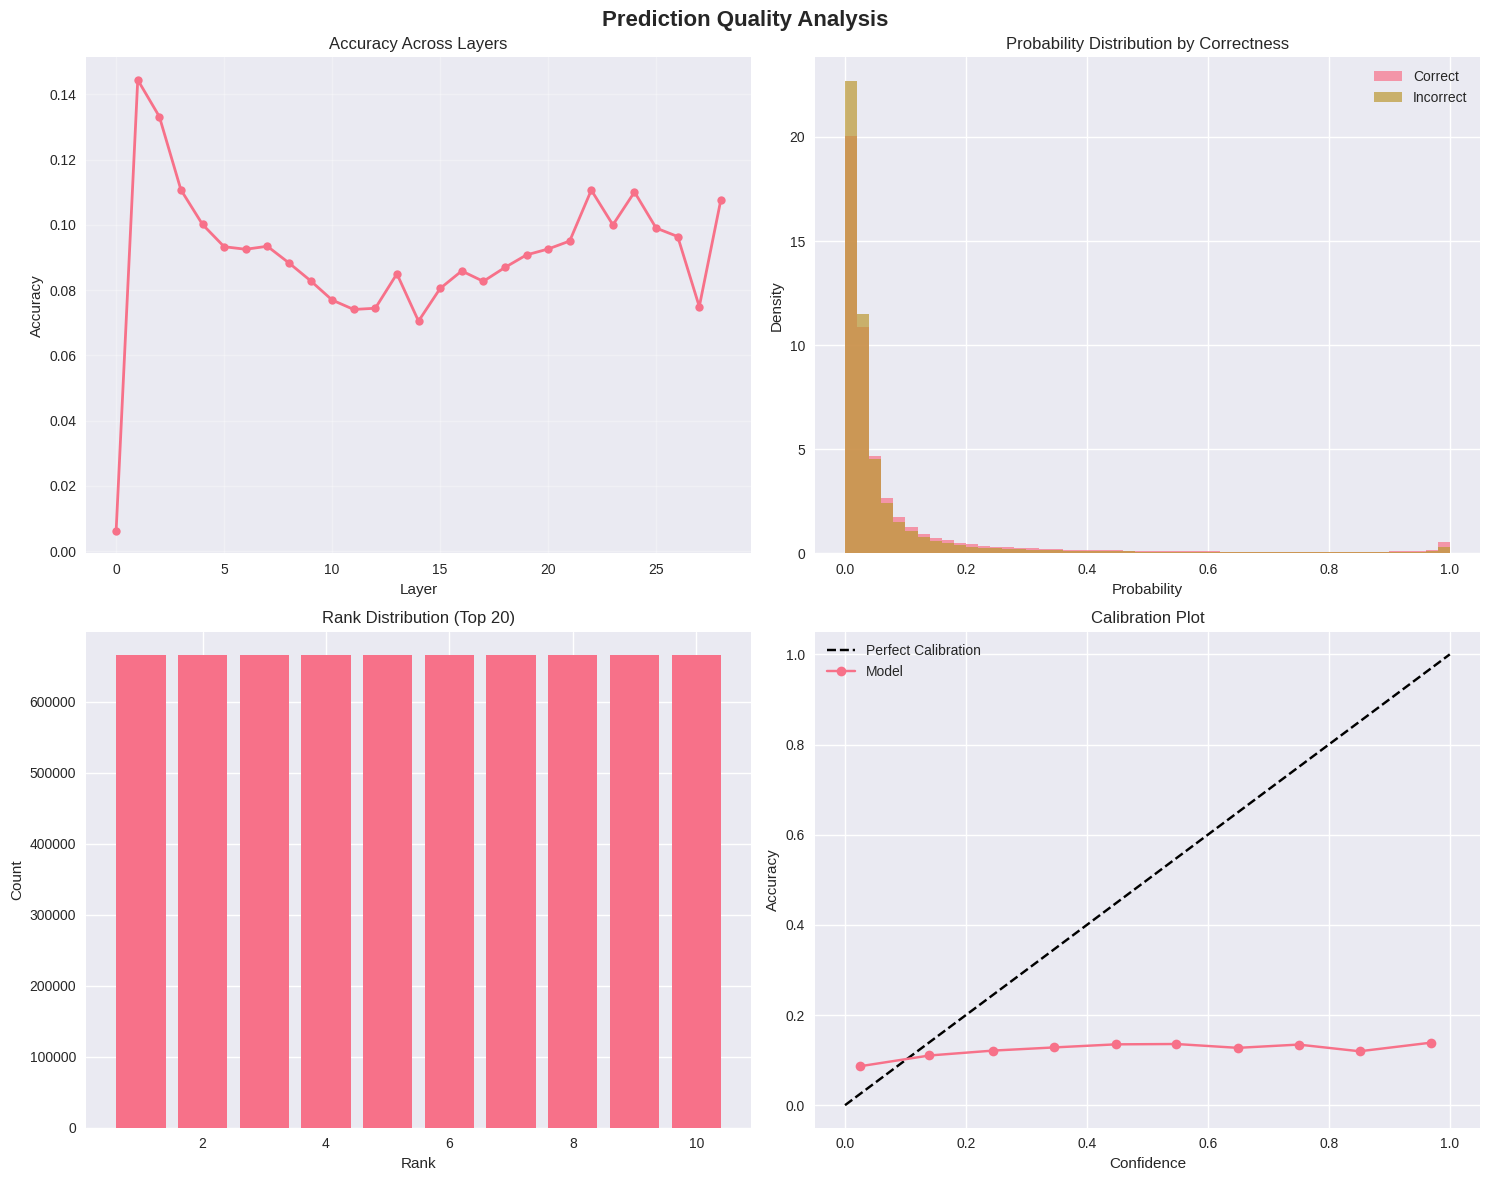

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Prediction Quality Analysis', fontsize=16, fontweight='bold')

# Accuracy across layers
accuracy_by_layer = df.groupby('layer')['match_gold_answer'].mean().reset_index()
axes[0,0].plot(accuracy_by_layer['layer'], accuracy_by_layer['match_gold_answer'], 
               marker='o', linewidth=2, markersize=6)
axes[0,0].set_xlabel('Layer')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Accuracy Across Layers')
axes[0,0].grid(True, alpha=0.3)

# Probability distribution by correctness
correct_probs = df[df['match_gold_answer']]['probability']
incorrect_probs = df[~df['match_gold_answer']]['probability']
axes[0,1].hist(correct_probs, bins=50, alpha=0.7, label='Correct', density=True)
axes[0,1].hist(incorrect_probs, bins=50, alpha=0.7, label='Incorrect', density=True)
axes[0,1].set_xlabel('Probability')
axes[0,1].set_ylabel('Density')
axes[0,1].set_title('Probability Distribution by Correctness')
axes[0,1].legend()

# Rank distribution
rank_counts = df['rank'].value_counts().sort_index()
axes[1,0].bar(rank_counts.index[:20], rank_counts.values[:20])  # Top 20 ranks
axes[1,0].set_xlabel('Rank')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Rank Distribution (Top 20)')

# Calibration plot
bin_boundaries = np.linspace(0, 1, 11)
bin_lowers = bin_boundaries[:-1]
bin_uppers = bin_boundaries[1:]
accuracies = []
confidences = []

for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
    in_bin = (df['probability'] > bin_lower) & (df['probability'] <= bin_upper)
    prop_in_bin = in_bin.mean()
    if prop_in_bin > 0:
        accuracy_in_bin = df[in_bin]['match_gold_answer'].mean()
        avg_confidence_in_bin = df[in_bin]['probability'].mean()
        accuracies.append(accuracy_in_bin)
        confidences.append(avg_confidence_in_bin)

axes[1,1].plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
axes[1,1].plot(confidences, accuracies, 'o-', label='Model')
axes[1,1].set_xlabel('Confidence')
axes[1,1].set_ylabel('Accuracy')
axes[1,1].set_title('Calibration Plot')
axes[1,1].legend()

plt.tight_layout()
plt.show()

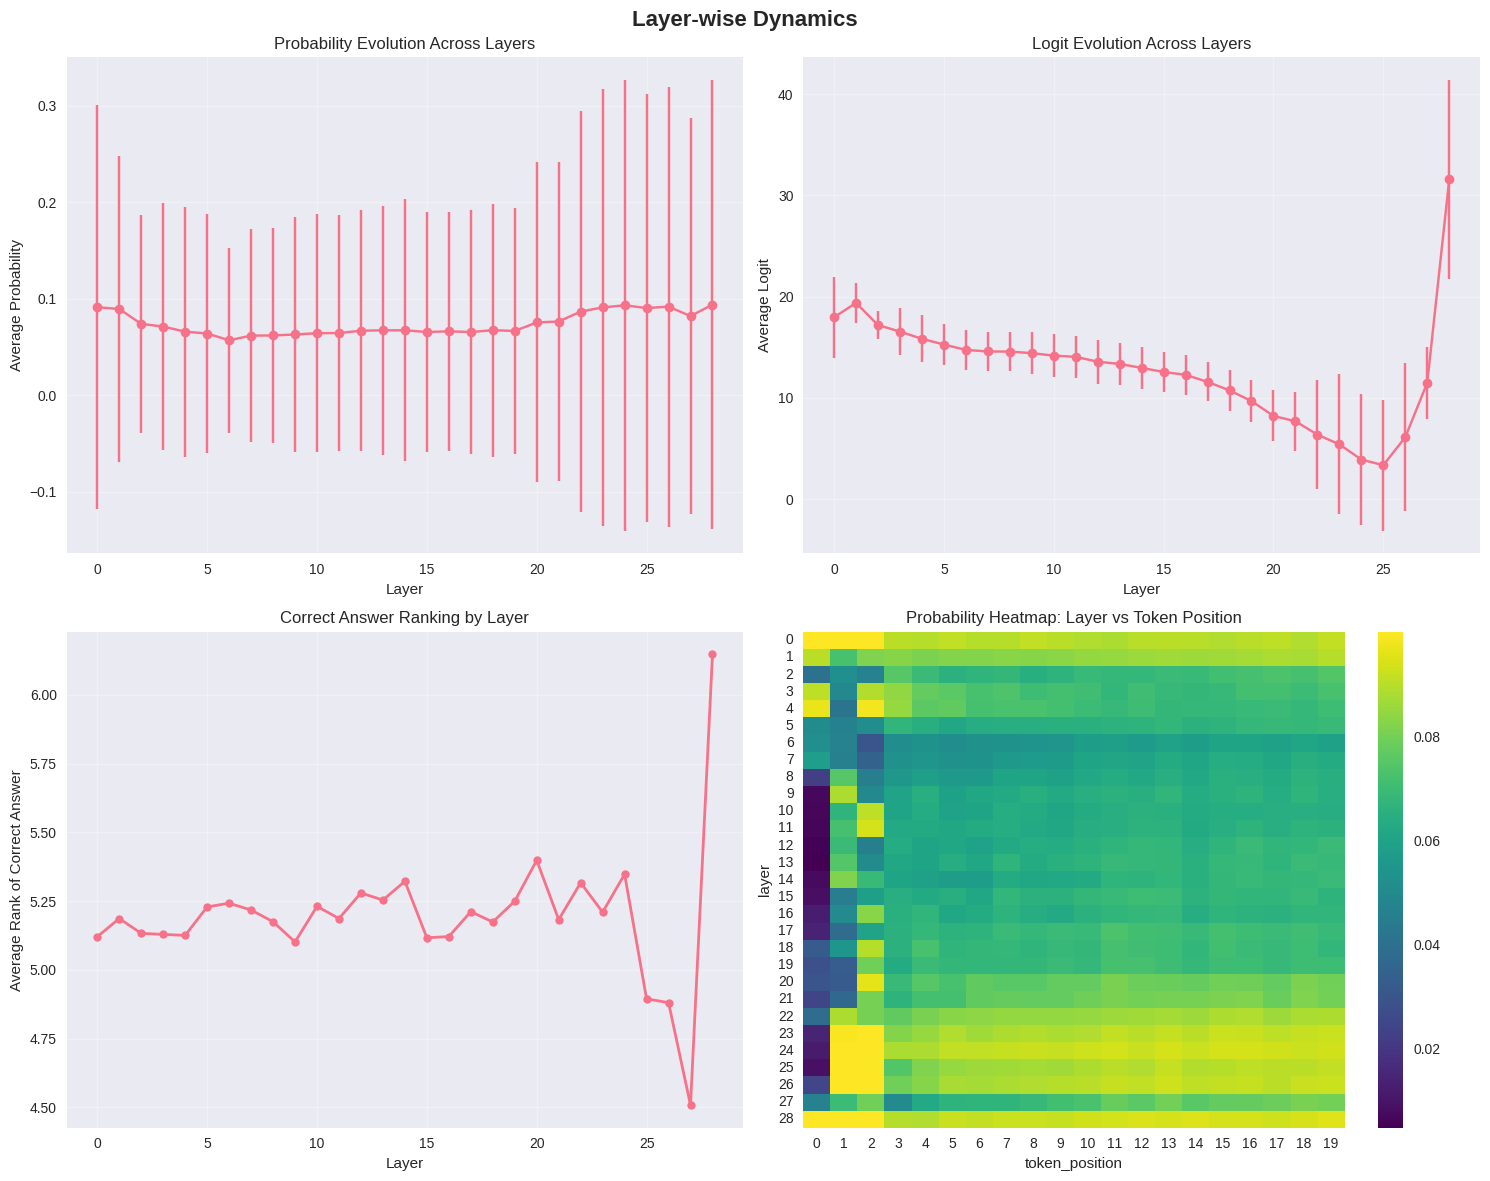

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Layer-wise Dynamics', fontsize=16, fontweight='bold')

# Average probability by layer
prob_by_layer = df.groupby('layer')['probability'].agg(['mean', 'std']).reset_index()
axes[0,0].errorbar(prob_by_layer['layer'], prob_by_layer['mean'], 
                   yerr=prob_by_layer['std'], marker='o', capsize=5)
axes[0,0].set_xlabel('Layer')
axes[0,0].set_ylabel('Average Probability')
axes[0,0].set_title('Probability Evolution Across Layers')
axes[0,0].grid(True, alpha=0.3)

# Average logit by layer
logit_by_layer = df.groupby('layer')['logit'].agg(['mean', 'std']).reset_index()
axes[0,1].errorbar(logit_by_layer['layer'], logit_by_layer['mean'], 
                   yerr=logit_by_layer['std'], marker='o', capsize=5)
axes[0,1].set_xlabel('Layer')
axes[0,1].set_ylabel('Average Logit')
axes[0,1].set_title('Logit Evolution Across Layers')
axes[0,1].grid(True, alpha=0.3)

# Rank of correct answer by layer
correct_answers = df[df['match_gold_answer']]
rank_by_layer = correct_answers.groupby('layer')['rank'].mean().reset_index()
axes[1,0].plot(rank_by_layer['layer'], rank_by_layer['rank'], 
               marker='o', linewidth=2, markersize=6)
axes[1,0].set_xlabel('Layer')
axes[1,0].set_ylabel('Average Rank of Correct Answer')
axes[1,0].set_title('Correct Answer Ranking by Layer')
axes[1,0].grid(True, alpha=0.3)

# Layer heatmap: probability vs position
pivot_data = df.groupby(['layer', 'token_position'])['probability'].mean().reset_index()
pivot_table = pivot_data.pivot(index='layer', columns='token_position', values='probability')
sns.heatmap(pivot_table.iloc[:, :20], ax=axes[1,1], cmap='viridis')  # First 20 positions
axes[1,1].set_title('Probability Heatmap: Layer vs Token Position')

plt.tight_layout()
plt.show()

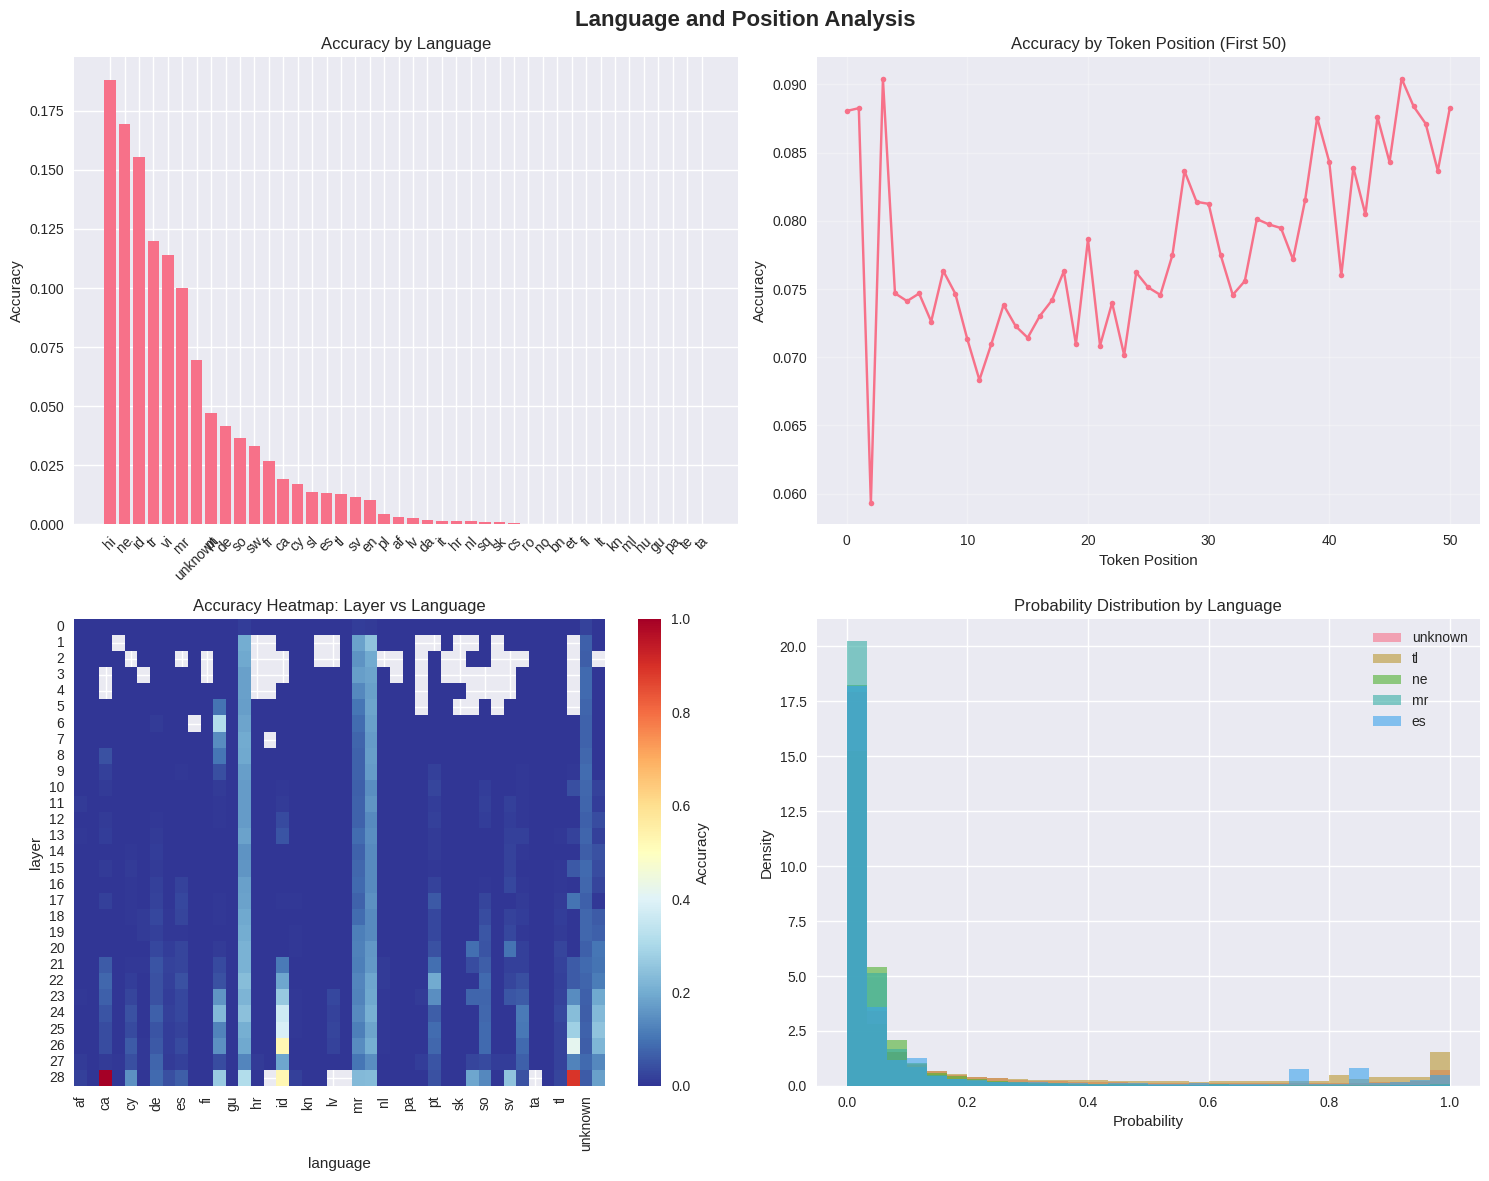

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Language and Position Analysis', fontsize=16, fontweight='bold')

# Language performance comparison
lang_performance = df.groupby('language')['match_gold_answer'].mean().reset_index()
lang_performance = lang_performance.sort_values('match_gold_answer', ascending=False)
axes[0,0].bar(range(len(lang_performance)), lang_performance['match_gold_answer'])
axes[0,0].set_xticks(range(len(lang_performance)))
axes[0,0].set_xticklabels(lang_performance['language'], rotation=45)
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Accuracy by Language')

# Position bias analysis
pos_accuracy = df.groupby('token_position')['match_gold_answer'].mean().reset_index()
pos_accuracy = pos_accuracy[pos_accuracy['token_position'] <= 50]  # First 50 positions
axes[0,1].plot(pos_accuracy['token_position'], pos_accuracy['match_gold_answer'], 
               marker='o', markersize=4)
axes[0,1].set_xlabel('Token Position')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_title('Accuracy by Token Position (First 50)')
axes[0,1].grid(True, alpha=0.3)

# Language vs layer interaction
lang_layer_acc = df.groupby(['language', 'layer'])['match_gold_answer'].mean().reset_index()
lang_pivot = lang_layer_acc.pivot(index='layer', columns='language', values='match_gold_answer')
sns.heatmap(lang_pivot, ax=axes[1,0], cmap='RdYlBu_r', cbar_kws={'label': 'Accuracy'})
axes[1,0].set_title('Accuracy Heatmap: Layer vs Language')

# Probability distribution by language
languages = df['language'].unique()[:5]  # Top 5 languages
for lang in languages:
    lang_probs = df[df['language'] == lang]['probability']
    axes[1,1].hist(lang_probs, bins=30, alpha=0.6, label=lang, density=True)
axes[1,1].set_xlabel('Probability')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Probability Distribution by Language')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [17]:
print("Creating interactive Plotly visualizations...")

# Interactive layer progression
layer_stats = df.groupby('layer').agg({
    'match_gold_answer': 'mean',
    'probability': ['mean', 'std'],
    'logit': ['mean', 'std'],
    'rank': 'mean'
}).round(4)

layer_stats.columns = ['accuracy', 'prob_mean', 'prob_std', 'logit_mean', 'logit_std', 'avg_rank']
layer_stats = layer_stats.reset_index()

fig_interactive = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Accuracy by Layer', 'Probability by Layer', 
                   'Logit by Layer', 'Average Rank by Layer'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Add traces
fig_interactive.add_trace(
    go.Scatter(x=layer_stats['layer'], y=layer_stats['accuracy'], 
              mode='lines+markers', name='Accuracy'),
    row=1, col=1
)

fig_interactive.add_trace(
    go.Scatter(x=layer_stats['layer'], y=layer_stats['prob_mean'],
              error_y=dict(type='data', array=layer_stats['prob_std']),
              mode='lines+markers', name='Probability'),
    row=1, col=2
)

fig_interactive.add_trace(
    go.Scatter(x=layer_stats['layer'], y=layer_stats['logit_mean'],
              error_y=dict(type='data', array=layer_stats['logit_std']),
              mode='lines+markers', name='Logit'),
    row=2, col=1
)

fig_interactive.add_trace(
    go.Scatter(x=layer_stats['layer'], y=layer_stats['avg_rank'],
              mode='lines+markers', name='Avg Rank'),
    row=2, col=2
)

fig_interactive.update_layout(height=800, showlegend=False, 
                            title_text="Interactive Layer Analysis")
fig_interactive.show()

# Interactive language comparison
lang_layer_data = df.groupby(['language', 'layer'])['match_gold_answer'].mean().reset_index()
fig_lang = px.line(lang_layer_data, x='layer', y='match_gold_answer', 
                   color='language', title='Accuracy by Layer and Language')
fig_lang.show()

# Interactive 3D scatter
sample_3d = df.sample(5000)  # Sample for 3D plot performance
fig_3d = px.scatter_3d(sample_3d, x='layer', y='token_position', z='probability',
                       color='match_gold_answer', title='3D: Layer vs Position vs Probability')
fig_3d.show()

print("Analysis complete! All visualizations have been generated.")

Creating interactive Plotly visualizations...


Analysis complete! All visualizations have been generated.


In [18]:
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

print(f"Total samples analyzed: {len(df):,}")
print(f"Number of layers: {df['layer'].nunique()}")
print(f"Number of languages: {df['language'].nunique()}")
print(f"Overall accuracy: {df['match_gold_answer'].mean():.3f}")
print(f"Average probability: {df['probability'].mean():.3f}")
print(f"Average rank: {df['rank'].mean():.1f}")

print(f"\nLanguages: {list(df['language'].unique())}")
print(f"Layer range: {df['layer'].min()} - {df['layer'].max()}")
print(f"Token position range: {df['token_position'].min()} - {df['token_position'].max()}")

# Performance by layer summary
layer_summary = df.groupby('layer')['match_gold_answer'].mean()
print(f"\nBest performing layer: {layer_summary.idxmax()} (accuracy: {layer_summary.max():.3f})")
print(f"Worst performing layer: {layer_summary.idxmin()} (accuracy: {layer_summary.min():.3f})")


SUMMARY STATISTICS
Total samples analyzed: 6,652,310
Number of layers: 29
Number of languages: 42
Overall accuracy: 0.091
Average probability: 0.074
Average rank: 5.5

Languages: ['unknown', 'tl', 'ne', 'mr', 'es', 'de', 'te', 'fr', 'gu', 'ta', 'kn', 'pa', 'hi', 'bn', 'so', 'cy', 'ro', 'da', 'en', 'ml', 'af', 'sk', 'sw', 'it', 'cs', 'et', 'vi', 'ca', 'lv', 'no', 'sv', 'sq', 'nl', 'id', 'pl', 'hr', 'hu', 'lt', 'pt', 'sl', 'tr', 'fi']
Layer range: 0 - 28
Token position range: 0 - 198

Best performing layer: 1 (accuracy: 0.144)
Worst performing layer: 0 (accuracy: 0.006)
